<a href="https://colab.research.google.com/github/MAICHIVINH/BachHoaXanh/blob/master/01%20Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Session #1: Introduction**


by Sihyeon Kim (mlv lab @ Korea University) on October 2019

for SKC Lecture, Fall 2019 (Prof. Hyunwoo J. Kim)


---
**Contents**
1. Introduction to computer vision library in python
2. Image Filtering: Linear Filter
3. Image Resampling


**Reference**


*   [Understanding Numpy for Computer Vision](https://www.suntos.com.np/computer-vision-for-robotics/understanding-numpy-for-computer-vision.html#what-is-numpy-routine-for-computing-complex-array)
*   [Distance measurements with scipy](https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html)
* [Computer Vision for Beginners](https://towardsdatascience.com/computer-vision-for-beginners-part-1-7cca775f58ef)
* [Linear Filtering](https://github.com/MLman/computer-vision-AAA534/blob/master/01-image%20filtering/01-linear%20filtering.ipynb)
* [Image Resampling](https://github.com/MLman/computer-vision-AAA534/blob/master/03-image%20resampling/03-image%20resampling.ipynb)
---




**0. Preparation**


*   For your convenience, it is recommended to mount your Google Drive first.
*   Then create extra space for this tutorial in there.


---






In [5]:
from google.colab import drive
root = '/content/drive/'
drive.mount(root)

Mounted at /content/drive/


In [6]:
# Making Directory

import os
from os.path import join

labsession01 = "My Drive/Colab Notebooks/SKC/"   # a custom path. you can change if you want to
labsession01_PATH = join(root,labsession01)
!mkdir "{labsession01_PATH}"

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/SKC/’: File exists




---


# **1. Introduction to computer vision library in python**

What is NumPy?

*   a library for the Python programming language, adding support for **large, multi-dimensional arrays and matrices**, along with a large collection of high-level **mathematical functions** to operate on these arrays
*   Images are represented as multi-dimensional arrays
      
      ex) 400 x 300 pixels RGB color image -> (400,300,3) 3-d array
* Numpy provides the powerful data structure known as **n-d array** and functions for numerical analysis on these arrrays





In [7]:
import numpy as np

# Creating 1-d (rank 1) array

a = np.array([1, 2, 3])   # Create a rank 1 array
print(a)
print(type(a))
print(a.shape)
print(a[0], a[1], a[2])
print('\n')

a[0] = 5                  # Change an element of the array
print(a)

[1 2 3]
<class 'numpy.ndarray'>
(3,)
1 2 3


[5 2 3]


In [8]:
# Creating n-d (rank n) array

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b)
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


In [9]:
# Predefined Function

a = np.zeros((2,2))   # Create an array of all zeros
print(a)

b = np.ones((1,2))    # Create an array of all ones
print(b)

c = np.full((2,2), 7)  # Create a constant array
print(c)

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)

e = np.random.random((2,2))  # Create an array filled with random values
print(e)

x = np.arange(6)      # Return evenly spaced values within a given interval
print(x)
y = np.arange(0,6,2)
print(y)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.96020587 0.2313201 ]
 [0.08301602 0.62186725]]
[0 1 2 3 4 5]
[0 2 4]


In [10]:
# Accessing, Slicing, Manipulating

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])      # Create a rank 2 array with shape (3.4)
print(a)
print('\n')

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
b = a[:2, 1:3]
print(b)
print('\n')

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


[[2 3]
 [6 7]]


2
77


In [11]:
#  Reshaping to 1-d (Flattening)

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

a1 = a.reshape(-1)
a2 = a.flatten()
a3 = np.ravel(a)

print(a1);print(a2);print(a3);

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]



What is SciPy?

*   Python-based ecosystem of open-source software for mathematics, science, and engineering. (from official web)
*    SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering
*   Highly related with NumPy, Matplotlib, Sympy, pandas. Especially, SciPy uses NumPy's **ndarray as a base data structure**
*   Related to computer vision?
      
      ex) Using distance functions in SciPy to compare two images (calculating distance to measure similarity)

*   **scipy.ndimage** : for nd-arrays. Basic filtering, mathematical morphology, regions properties




In [12]:
# Calculating distance between two vectors
import scipy.spatial.distance as dist

# Prepare 2 vectors (data points) of 10 dimensions
A = np.random.uniform(0, 10, 10)
B = np.random.uniform(0, 10, 10)

print('Two 10-dimensional vectors: A, B')
print('------------------------')
print(A)
print(B)

# Perform distance measurements
print('\nDistance measurements with 10-dimensional vectors')
print('-------------------------------------------------')
print('Euclidean distance is', dist.euclidean(A, B))
print('Manhattan distance is', dist.cityblock(A, B))
print('Chebyshev distance is', dist.chebyshev(A, B))
print('Canberra distance is', dist.canberra(A, B))
print('Cosine distance is', dist.cosine(A, B))


Two 10-dimensional vectors: A, B
------------------------
[2.38176077 1.45807979 2.36620951 8.48911827 6.37309867 3.17394586
 3.55852671 3.69554952 1.56531809 4.29789628]
[9.69629026 5.410769   8.75183755 6.70937879 6.06375483 2.11988339
 8.10230714 3.57044062 1.92197188 1.84591271]

Distance measurements with 10-dimensional vectors
-------------------------------------------------
Euclidean distance is 11.877607975514675
Manhattan distance is 28.273519219754128
Chebyshev distance is 7.314529496599393
Canberra distance is 3.0047398737409736
Cosine distance is 0.20716624238189008



What is OpenCV?

*   Open source library for real-time Image/Video Processing and Computer Vision
      
      ex) Image/Video Processing, 3D Reconstruction, Edge Detection, Object Detection, Noise Reduction...etc



In [13]:
!cd "{labsession01_PATH}";/trannn.png/330px-trannn.png;
!cd "{labsession01_PATH}";/trannn.png/330px-trannn.png

/bin/bash: line 1: /trannn.png/330px-trannn.png: No such file or directory
/bin/bash: line 1: /trannn.png/330px-trannn.png: No such file or directory


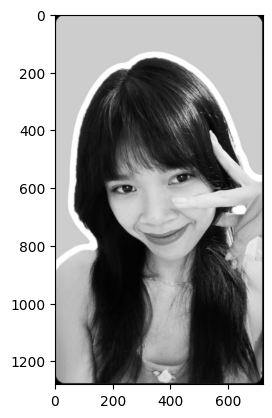

In [14]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img_lena = cv2.imread('/content/drive/MyDrive/trannn.png')
plt.imshow(img_lena)

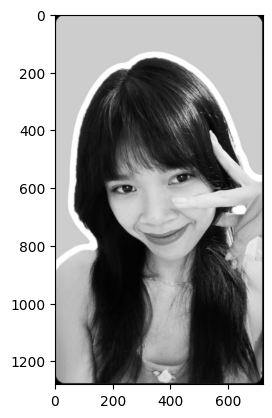

In [15]:
img_lena_rgb = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)
plt.imshow(img_lena_rgb)

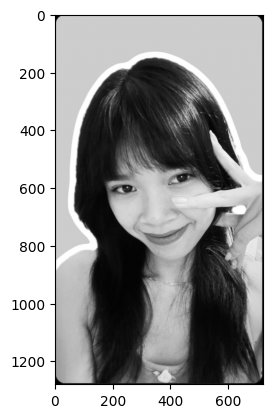

In [16]:
# Convert the image into gray scale
img_lena_gray = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
plt.imshow(img_lena_gray, cmap = 'gray')

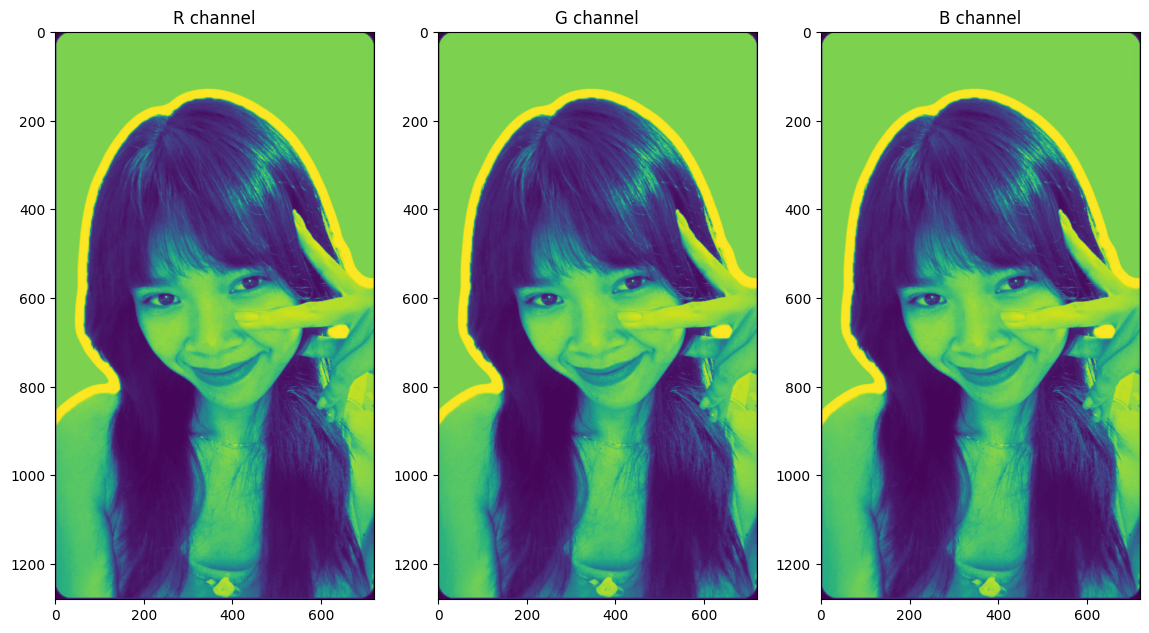

In [17]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 14))
title_list = ['R channel','G channel','B channel']
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_lena_rgb[:, :, i])
    ax.title.set_text(title_list[i])
plt.show()

# **2. Image Filtering: Linear Filter**

1) Adding Noise

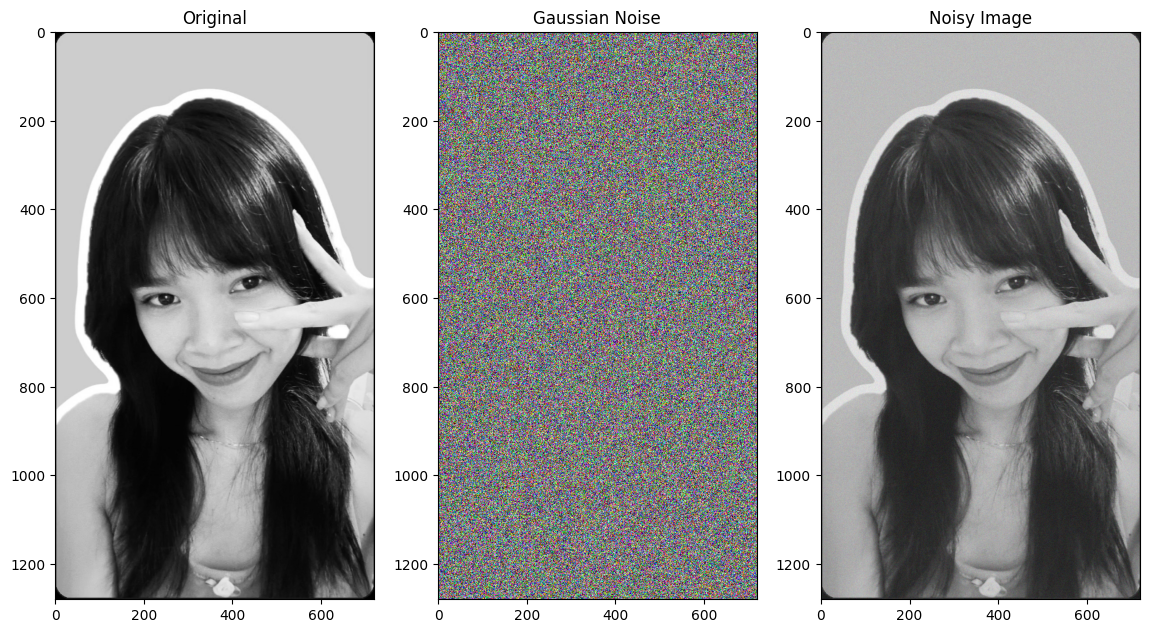

In [18]:
# Add Gaussian noise to an image
mean = 0
var = 100
sigma = var ** 0.5

gaussian = np.random.normal(mean, sigma, img_lena_rgb.shape)   # Gaussian noise definition

noisy_image = np.zeros(img_lena_rgb.shape, np.float32)  # initialization
noisy_image = img_lena_rgb + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 14))
image_list = [img_lena_rgb, gaussian, noisy_image]
title_list = ['Original','Gaussian Noise','Noisy Image']
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()

2) Reducing Noise

In [19]:
!cd "{labsession01_PATH}";wget https://boofcv.org/images/thumb/6/66/trannn.png/300px-trannn.png;
!cd "{labsession01_PATH}";ls

--2025-02-22 07:35:36--  https://boofcv.org/images/thumb/6/66/trannn.png/300px-trannn.png
Resolving boofcv.org (boofcv.org)... 205.196.217.27
Connecting to boofcv.org (boofcv.org)|205.196.217.27|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-22 07:35:37 ERROR 404: Not Found.

 300px-Kodim17_noisy.jpg  '330px-Lenna_(test_image).png'


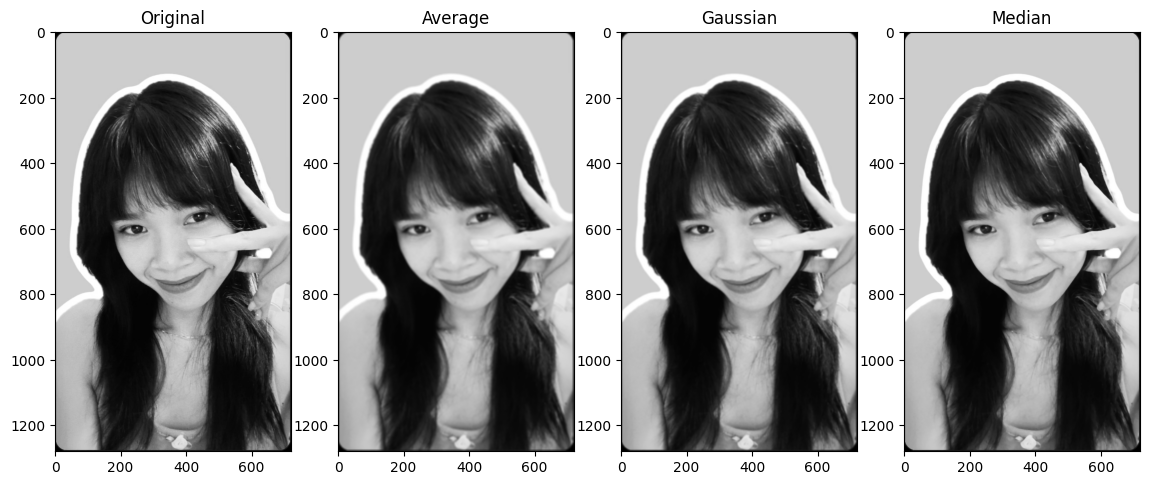

In [20]:
# original image (relatively noisy)
img = cv2.imread('/content/drive/MyDrive/trannn.png')

# Averaging with cv2.blur(src, ksize)
avg = cv2.blur(img,(7,7))

# Gaussian filtering with cv2.GaussianBlur(img, ksize, sigmaX)
gauss = cv2.GaussianBlur(img,(5,5),10)


# median filtering cv2.medianBlur(src, ksize)
median = cv2.medianBlur(img, 5)

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (14, 14))
image_list = [img, avg, gauss, median]
title_list = ['Original', 'Average', 'Gaussian', 'Median']
for i in range(0, 4):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()


3) Linear Filter

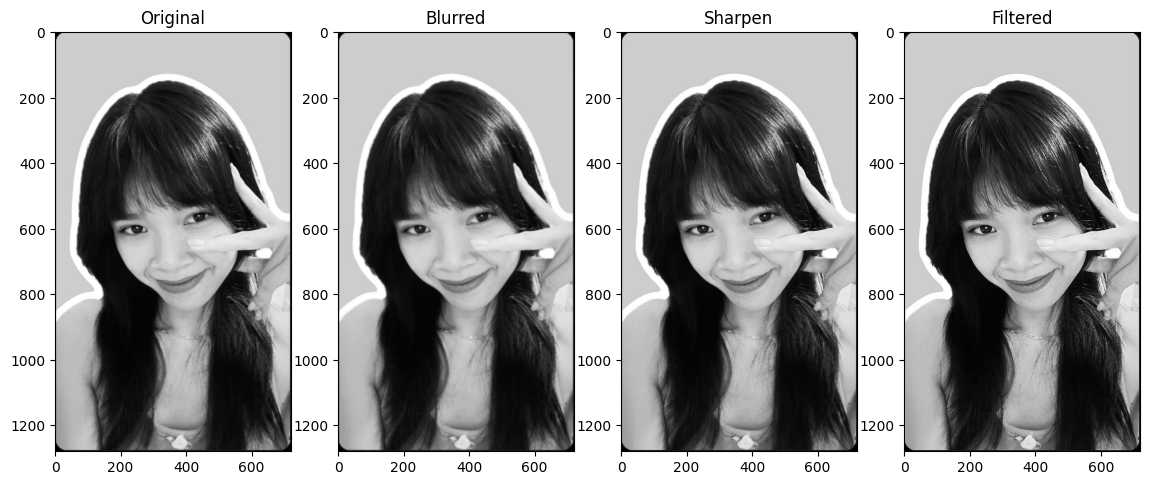

In [21]:
blurred = cv2.GaussianBlur(img,(0,0), 1)

# sharping filtering with cv2.addWeighted()
filtered_img = cv2.addWeighted(img, 1.5, blurred, -0.5, 0.0)

# cv2.filter2D() convolve a kernel with an image
kernel = np.zeros((3,3),np.float32)
kernel[1][1] = 5
kernel[1][0] = -1                  #  0 -1  0
kernel[0][1] = -1                  # -1  5 -1
kernel[1][2] = -1                  #  0 -1  0
kernel[2][1] = -1
filtered = cv2.filter2D(img, -1, kernel)


fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (14, 14))
image_list = [img, blurred, filtered_img, filtered]
title_list = ['Original', 'Blurred','Sharpen', 'Filtered']
for i in range(0, 4):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()

# **3. Image Resampling**

In [22]:
!cd "{labsession01_PATH}";wget https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/05/amazing_choc_cupcakes.jpg?itok=aeKOFRRI;
!cd "{labsession01_PATH}";ls

--2025-02-22 07:35:52--  https://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe/recipe-image/2019/05/amazing_choc_cupcakes.jpg?itok=aeKOFRRI
Resolving www.bbcgoodfood.com (www.bbcgoodfood.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to www.bbcgoodfood.com (www.bbcgoodfood.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-22 07:35:55 ERROR 404: Not Found.

 300px-Kodim17_noisy.jpg  '330px-Lenna_(test_image).png'


1) Image scaling

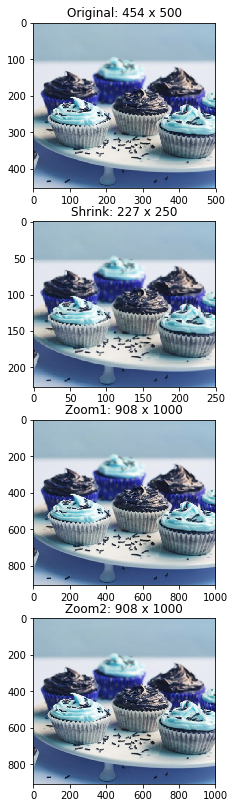

In [ ]:
# scaling by cv2.resize
img_cc = cv2.imread('/content/drive/My Drive/Colab Notebooks/SKC/amazing_choc_cupcakes.jpg?itok=aeKOFRRI')
img_cc_rgb = cv2.cvtColor(img_cc, cv2.COLOR_BGR2RGB)
height, width = img_cc.shape[:2]

shrink = cv2.resize(img_cc, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
zoom1 = cv2.resize(img_cc, (width*2, height*2), interpolation=cv2.INTER_CUBIC)
zoom2 = cv2.resize(img_cc, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(nrows = 4, ncols = 1,figsize = (14, 14))
image_list = [img_cc,shrink,zoom1,zoom2]
title_list = ['Original', 'Shrink','Zoom1', 'Zoom2']
for i in range(0, 4):
    ax = axs[i]
    h, w = image_list[i].shape[:2]
    title = f'{title_list[i]}: {h} x {w}'

    ax.imshow(image_list[i])
    ax.title.set_text(title)
plt.show()

2) Image pyramid

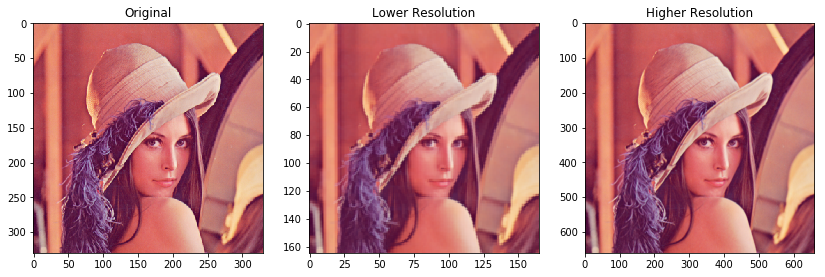

In [ ]:
# gaussian image pyramid with cv2.pyrUp & cv2.pyrDown
lower_reso = cv2.pyrDown(img_lena_rgb) # *1/4
higher_reso = cv2.pyrUp(img_lena_rgb)  # *4

fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (14, 14))
image_list = [img_lena_rgb,lower_reso,higher_reso]
title_list = ['Original', 'Lower Resolution','Higher Resolution']
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()


(330, 330, 3)


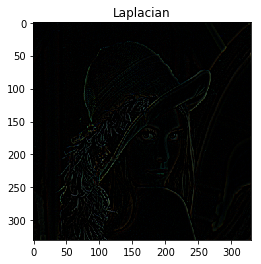

In [ ]:
# laplacian image pyramid by subtracting a level in Pyramid and expanded version of its upper level in Pyramid
gp_down = cv2.pyrDown(img_lena_rgb)
print(img_lena_rgb.shape)
gp_up = cv2.pyrUp(gp_down)
temp = cv2.resize(gp_up, (330, 330))
result = cv2.subtract(img_lena_rgb, temp)

plt.imshow(result)
plt.title('Laplacian')
plt.show()